<a href="https://colab.research.google.com/github/subham129/Machine-Learning-/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.describe()

,Survived,Age,Fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,13.002015,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,22.000000,7.910400
50%,0.000000,29.699118,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


In [ ]:
X = df[['Age','Fare']]
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-7-e6b5f2eb1ff8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


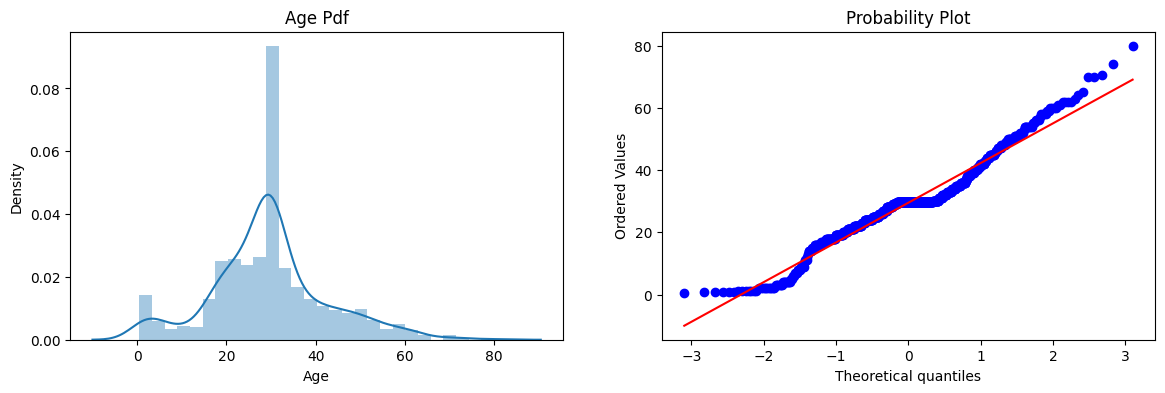

In [ ]:
from math import dist
from scipy import stats
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Pdf')
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()

In [ ]:
trf = FunctionTransformer(func=np.log1p)
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)
y_pred = clf.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)
print(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred2,y_test))

0.6815642458100558
0.664804469273743


In [ ]:
X_trf = trf.fit_transform(X)
print("lr",np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=100)))
print("dt",np.mean(cross_val_score(clf2,X_trf,y,scoring='accuracy',cv=100)))

lr 0.68
dt 0.6545833333333333


In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')
X_test_trf2 = trf2.fit_transform(X_test)
X_train_trf2 = trf2.fit_transform(X_train)
clf3 = LogisticRegression()
clf3.fit(X_train_trf2,y_train)
y = clf3.predict(X_test_trf2)
accuracy_score(y,y_test)


0.6703910614525139

In [ ]:
def apply_transform(transform):
  x = df[['Age','Fare']]
  y = df['Survived']

  trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_trans = trf.fit_transform(x)

  clf = LogisticRegression()
  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x['Fare'],dist='norm',plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist='norm',plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.6589013732833957


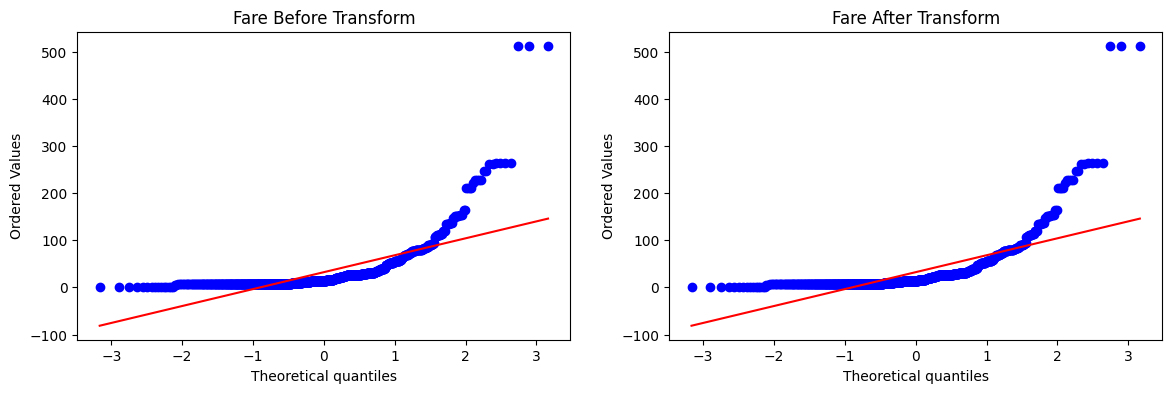

In [ ]:
apply_transform(lambda x: x)

Accuracy 0.6611485642946316


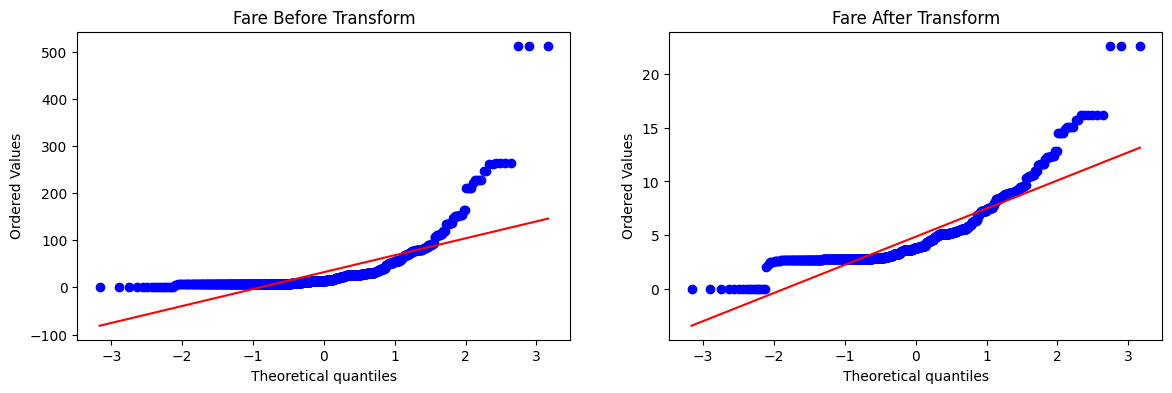

In [ ]:
apply_transform(lambda x: np.sqrt(x))

Accuracy 0.6633957553058677


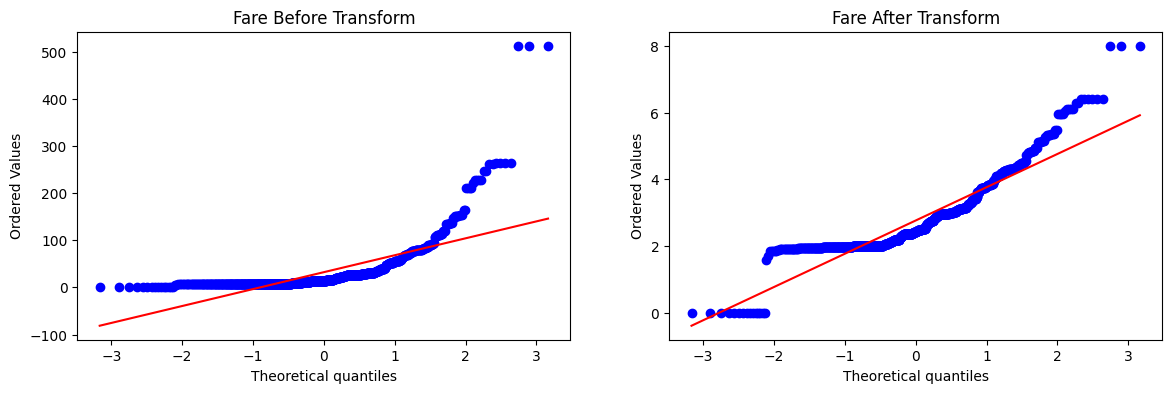

In [ ]:
apply_transform(lambda x: np.cbrt(x))